In [179]:
import numpy as np
import matplotlib.pyplot as plt

In [180]:
from sklearn.datasets import load_iris

iris = load_iris()
D = iris.data
L = iris.target

## PCA

In [181]:
mu=D.mean(0)
mu

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [182]:
#centralizziamo i dati
DC=(D-mu)

In [183]:
C=(DC.T @ DC)/DC.shape[0]
C

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

In [184]:
s,U= np.linalg.eigh(C)
s

array([0.02367619, 0.0776881 , 0.24105294, 4.20005343])

In [185]:
U

array([[ 0.31548719,  0.58202985,  0.65658877, -0.36138659],
       [-0.3197231 , -0.59791083,  0.73016143,  0.08452251],
       [-0.47983899, -0.07623608, -0.17337266, -0.85667061],
       [ 0.75365743, -0.54583143, -0.07548102, -0.3582892 ]])

In [186]:
P = U[:, ::-1][:, 0:2]
P

array([[-0.36138659,  0.65658877],
       [ 0.08452251,  0.73016143],
       [-0.85667061, -0.17337266],
       [-0.3582892 , -0.07548102]])

In [187]:
#Un altro modo per ottenere P è questo:
U, s, Vh = np.linalg.svd(C) #scomposizione Singular Value Decomposition
P = U[:, 0:2]
P



array([[-0.36138659, -0.65658877],
       [ 0.08452251, -0.73016143],
       [-0.85667061,  0.17337266],
       [-0.3582892 ,  0.07548102]])

In [188]:
DP_2D = np.dot(D,P) #proiezione di D nel nuovo spazio vettoriale con una base di dimensione ridotta
DP_2D

array([[-2.81823951, -5.64634982],
       [-2.78822345, -5.14995135],
       [-2.61337456, -5.18200315],
       [-2.75702228, -5.0086536 ],
       [-2.7736486 , -5.65370709],
       [-3.2215055 , -6.06828303],
       [-2.68182738, -5.23749119],
       [-2.87622016, -5.49033754],
       [-2.6159824 , -4.74864082],
       [-2.82960933, -5.21317833],
       [-2.99541804, -5.97202148],
       [-2.8896099 , -5.34168252],
       [-2.71625587, -5.09184058],
       [-2.27856139, -4.81555799],
       [-2.85761474, -6.50571721],
       [-3.1163261 , -6.66501491],
       [-2.87883726, -6.13763209],
       [-2.85406843, -5.63880172],
       [-3.30254481, -6.19979162],
       [-2.91437873, -5.84051289],
       [-3.19210892, -5.71829851],
       [-2.9586599 , -5.75994864],
       [-2.28642572, -5.46042065],
       [-3.19963195, -5.42566143],
       [-3.14661108, -5.28967072],
       [-2.99569623, -5.1809357 ],
       [-3.03354506, -5.45790407],
       [-2.94004523, -5.69467143],
       [-2.86283042,

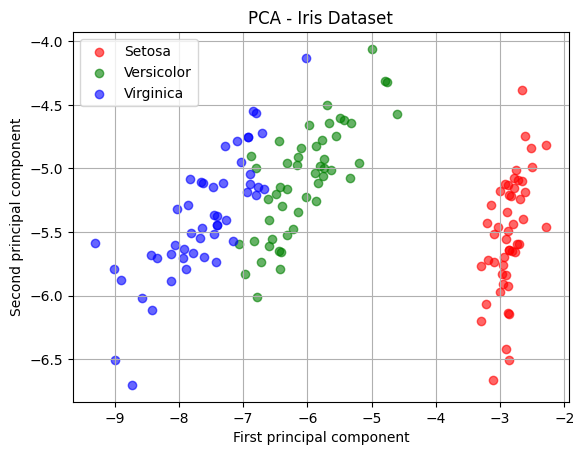

In [189]:
colors = ['red', 'green', 'blue']
labels = ['Setosa', 'Versicolor', 'Virginica']

for i in range(3):
    plt.scatter(DP_2D[L == i, 0], DP_2D[L == i, 1], label=labels[i], c=colors[i], alpha=0.6)

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA - Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

## LDA

In [190]:
def vcol(v):
    return v.reshape((v.size, 1))   # shape (d,1)

def vrow(v):
    return v.reshape((1, v.size))   # shape (1,d)


In [191]:
def compute_Sb_Sw(D, L):
    Sb = 0
    Sw = 0
    muGlobal = vcol(D.mean(1))
    for i in np.unique(L):
        DCls = D[:, L == i]
        mu = vcol(DCls.mean(1))
        Sb += (mu - muGlobal) @ (mu - muGlobal).T * DCls.shape[1]
        Sw += (DCls - mu) @ (DCls - mu).T
    return Sb / D.shape[1], Sw / D.shape[1]

SB, SW = compute_Sb_Sw(D.T, L)

SB, SW

(array([[ 0.42141422, -0.13301778,  1.101656  ,  0.47519556],
        [-0.13301778,  0.07563289, -0.38159733, -0.15288444],
        [ 1.101656  , -0.38159733,  2.91401867,  1.24516   ],
        [ 0.47519556, -0.15288444,  1.24516   ,  0.53608889]]),
 array([[0.259708  , 0.09086667, 0.164164  , 0.03763333],
        [0.09086667, 0.11308   , 0.05413867, 0.032056  ],
        [0.164164  , 0.05413867, 0.181484  , 0.041812  ],
        [0.03763333, 0.032056  , 0.041812  , 0.041044  ]]))

In [192]:
import scipy

s, U = scipy.linalg.eigh(SB, SW)
W = U[:, ::-1][:, 0:2] #m=2
W

array([[ 0.83779794,  0.02434685],
       [ 1.55005187,  2.18649663],
       [-2.22355955, -0.94138258],
       [-2.83899363,  2.86801283]])

In [193]:

DP_2D_LDA = np.dot(D,W) #proiezione di D nel nuovo spazio vettoriale con una base di dimensione ridotta
DP_2D_LDA

array([[  6.01716893,   7.03257409],
       [  5.0745834 ,   5.9344564 ],
       [  5.43939015,   6.46102462],
       [  4.75589325,   6.05166375],
       [  6.08839432,   7.24878907],
       [  5.65366246,   8.20566459],
       [  5.15936541,   7.08855228],
       [  5.55602799,   6.71735148],
       [  4.50067925,   5.70363331],
       [  5.291132  ,   5.77216652],
       [  6.35616273,   7.38303921],
       [  5.16611245,   6.61834385],
       [  5.27470297,   5.64522043],
       [  5.52287187,   5.91546178],
       [  7.82336533,   8.33114171],
       [  7.12473969,   9.49449347],
       [  6.54308629,   8.58221762],
       [  5.73326956,   7.31937537],
       [  6.03389602,   7.70751769],
       [  5.97592917,   7.8811861 ],
       [  5.44643525,   6.5388137 ],
       [  5.53702462,   7.94933772],
       [  6.64269897,   7.61560336],
       [  4.1883926 ,   7.17326384],
       [  4.49904458,   6.33592908],
       [  4.71365129,   5.74861457],
       [  4.76587331,   7.19681579],
 

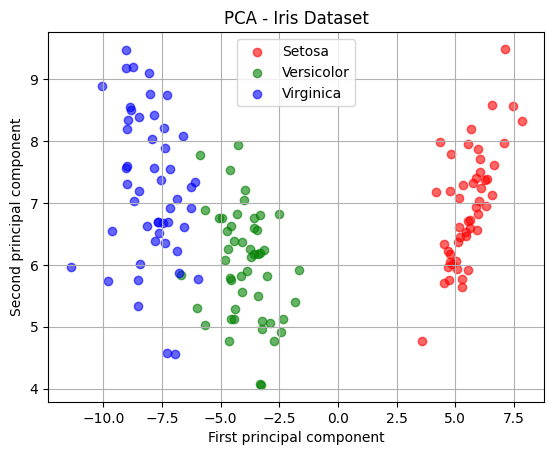

In [194]:
colors = ['red', 'green', 'blue']
labels = ['Setosa', 'Versicolor', 'Virginica']

for i in range(3):
    plt.scatter(DP_2D_LDA[L == i, 0], DP_2D_LDA[L == i, 1], label=labels[i], c=colors[i], alpha=0.6)

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA - Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

### PCA e LDA for classification

Per evitare overfitting non usiamo i dati di validazione per stimare i parametri (PCA o LDA). Una divisione semplice è 2/3 train e 1/3 validation.

In [195]:
#L’obiettivo del laboratorio è separare versicolor (label 1) e virginica (label 2).

DIris = iris['data'].T       # .T perché vogliamo colonna = campione
LIris = iris['target']

# Prendiamo solo le classi 1 e 2
D = DIris[:, LIris != 0]     # shape (4, N) dove N = numero di campioni delle classi 1 e 2
L = LIris[LIris != 0]        # labels corrispondenti (1 o 2)
def split_db_2to1(D, L, seed=0):
    nTrain = int(D.shape[1]*2.0/3.0)
    np.random.seed(seed)
    idx = np.random.permutation(D.shape[1])
    idxTrain = idx[0:nTrain]
    idxTest = idx[nTrain:]
    DTR = D[:, idxTrain]
    DVAL = D[:, idxTest]
    LTR = L[idxTrain]
    LVAL = L[idxTest]
    return (DTR, LTR), (DVAL, LVAL)
# DTR and LTR are model training data and labels
# DVAL and LVAL are validation data and labels
(DTR, LTR), (DVAL, LVAL) = split_db_2to1(D, L)

In [196]:
(DTR, LTR)

(array([[6.8, 6.3, 6.9, 7.6, 7.2, 6.8, 5.6, 6.3, 6.5, 6.7, 6.3, 5.8, 6.4,
         6.1, 4.9, 5.5, 6.3, 6.4, 6. , 6.6, 5. , 6.8, 5.5, 5.6, 5.7, 5.1,
         6.3, 5.9, 6.4, 6.2, 6.5, 7.4, 6.7, 7.7, 5.8, 6.7, 6.2, 4.9, 5.7,
         6.7, 6.4, 6.4, 5.8, 6.1, 6.5, 6.7, 5.8, 5.5, 5.6, 5.7, 6.9, 7.2,
         7. , 5.4, 6. , 6.3, 5.9, 6. , 6.1, 7.1, 5. , 5.5, 6.5, 7.3, 7.2,
         7.7],
        [2.8, 3.4, 3.1, 3. , 3.2, 3.2, 3. , 2.7, 3. , 3. , 2.9, 2.7, 2.8,
         2.9, 2.4, 2.4, 2.5, 2.9, 2.7, 2.9, 2.3, 3. , 2.3, 2.8, 3. , 2.5,
         3.3, 3. , 2.8, 2.8, 3.2, 2.8, 3.1, 2.6, 2.7, 3. , 2.2, 2.5, 2.5,
         3.3, 3.2, 2.7, 2.6, 3. , 2.8, 3.1, 2.7, 2.6, 3. , 2.8, 3.1, 3.6,
         3.2, 3. , 2.9, 3.3, 3. , 3.4, 2.8, 3. , 2. , 2.4, 3. , 2.9, 3. ,
         3. ],
        [4.8, 5.6, 4.9, 6.6, 6. , 5.9, 4.5, 4.9, 5.8, 5.2, 5.6, 5.1, 5.6,
         4.7, 3.3, 3.8, 4.9, 4.3, 5.1, 4.6, 3.3, 5.5, 4. , 4.9, 4.2, 3. ,
         4.7, 5.1, 5.6, 4.8, 5.1, 6.1, 5.6, 6.9, 5.1, 5. , 4.5, 4.5, 5. ,
        

In [197]:
(DVAL, LVAL)

(array([[5.8, 6.1, 5.6, 6.9, 5.6, 5.7, 5.7, 6.5, 6.2, 6. , 5.9, 6.7, 7.7,
         6.1, 6.6, 6.3, 7.9, 5.7, 5.5, 6.4, 6.7, 6. , 6. , 6.9, 6.4, 6.7,
         6.1, 6.3, 5.2, 6.3, 7.7, 5.8, 6.2, 5.6],
        [2.7, 2.6, 2.9, 3.1, 2.5, 2.6, 2.8, 3. , 3.4, 2.2, 3.2, 3.3, 2.8,
         3. , 3. , 2.3, 3.8, 2.9, 2.5, 3.2, 2.5, 2.2, 3. , 3.2, 3.1, 3.1,
         2.8, 2.8, 2.7, 2.5, 3.8, 2.8, 2.9, 2.7],
        [3.9, 5.6, 3.6, 5.4, 3.9, 3.5, 4.1, 5.2, 5.4, 5. , 4.8, 5.7, 6.7,
         4.9, 4.4, 4.4, 6.4, 4.2, 4. , 5.3, 5.8, 4. , 4.8, 5.7, 5.5, 4.7,
         4. , 5.1, 3.9, 5. , 6.7, 5.1, 4.3, 4.2],
        [1.2, 1.4, 1.3, 2.1, 1.1, 1. , 1.3, 2. , 2.3, 1.5, 1.8, 2.5, 2. ,
         1.8, 1.4, 1.3, 2. , 1.3, 1.3, 2.3, 1.8, 1. , 1.8, 2.3, 1.8, 1.5,
         1.3, 1.5, 1.4, 1.9, 2.2, 2.4, 1.3, 1.3]]),
 array([1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
        2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1]))

#### PCA

In [198]:
mu= DTR.mean(axis=1)
DC=DTR- vcol(mu)
mu,DC

(array([6.26363636, 2.86818182, 4.93030303, 1.68484848]),
 array([[ 0.53636364,  0.03636364,  0.63636364,  1.33636364,  0.93636364,
          0.53636364, -0.66363636,  0.03636364,  0.23636364,  0.43636364,
          0.03636364, -0.46363636,  0.13636364, -0.16363636, -1.36363636,
         -0.76363636,  0.03636364,  0.13636364, -0.26363636,  0.33636364,
         -1.26363636,  0.53636364, -0.76363636, -0.66363636, -0.56363636,
         -1.16363636,  0.03636364, -0.36363636,  0.13636364, -0.06363636,
          0.23636364,  1.13636364,  0.43636364,  1.43636364, -0.46363636,
          0.43636364, -0.06363636, -1.36363636, -0.56363636,  0.43636364,
          0.13636364,  0.13636364, -0.46363636, -0.16363636,  0.23636364,
          0.43636364, -0.46363636, -0.76363636, -0.66363636, -0.56363636,
          0.63636364,  0.93636364,  0.73636364, -0.86363636, -0.26363636,
          0.03636364, -0.36363636, -0.26363636, -0.16363636,  0.83636364,
         -1.26363636, -0.76363636,  0.23636364,  1.036

In [199]:
C=(DC @ DC.T)/DC.shape[1]
C

array([[0.45837466, 0.11293388, 0.44973829, 0.17202479],
       [0.11293388, 0.09368457, 0.12490358, 0.06754821],
       [0.44973829, 0.12490358, 0.65574839, 0.28758035],
       [0.17202479, 0.06754821, 0.28758035, 0.17674013]])

In [209]:
s,U=np.linalg.eigh(C)
P=U[:,::-1][:,:1]
P

array([[-0.57360601],
       [-0.16667285],
       [-0.73315983],
       [-0.3250738 ]])

#### LDA

In [202]:
SB,SW= compute_Sb_Sw(DTR,LTR)
SB,SW

(array([[0.09871779, 0.02684431, 0.19555937, 0.11225541],
        [0.02684431, 0.00729977, 0.05317843, 0.03052559],
        [0.19555937, 0.05317843, 0.38740197, 0.22237731],
        [0.11225541, 0.03052559, 0.22237731, 0.1276495 ]]),
 array([[0.35965686, 0.08608957, 0.25417892, 0.05976939],
        [0.08608957, 0.0863848 , 0.07172516, 0.03702262],
        [0.25417892, 0.07172516, 0.26834642, 0.06520304],
        [0.05976939, 0.03702262, 0.06520304, 0.04909063]]))

In [208]:
s, U = scipy.linalg.eigh(SB, SW)   # autovalori in ordine crescente
W = U[:, ::-1][:, :1]     # prendi le m direzioni discriminanti più rilevanti
W

array([[-0.88381021],
       [-1.56103706],
       [ 1.46175793],
       [ 4.051348  ]])

In [ ]:
# Andiamo ora a proiettare i dati

DTR_lda = W.T @ DTR      # shape (m, nTrain)
DVAL_lda = W.T @ DVAL    # shape (m, nVal)


In [211]:
threshold = (DTR_lda[0, LTR==1].mean() + DTR_lda[0, LTR==2].mean()) / 2.0 #Projected samples have only 1 dimension
threshold

np.float64(4.078616922547409)

In [213]:
PVAL = np.zeros(shape=LVAL.shape, dtype=np.int32)
PVAL[DVAL_lda[0] >= threshold] = 2
PVAL[DVAL_lda[0] < threshold] = 1


In [215]:
error_count = (PVAL != LVAL).sum()
error_rate = error_count / LVAL.size
error_rate

np.float64(0.058823529411764705)